# Assignment 1
Course: Mathematics of Generative Models \
Name: Md Faizal Karim \
Roll No: 2022121004

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import queue
import graphviz

plt.style.use('seaborn-v0_8')           
np.__version__

'1.24.4'

## Problem 1

Since, the total number of balls is not given, we will assume that our total number of balls is large, ie, $(n \rightarrow \infty) $ 

<img src= './soln1.jpeg' width='60%'>

Hence, we obtain p = 2/3

#### Simulating a Bernoulli random variable (p = 2/3) using numpy

In [81]:
x = np.random.binomial(n = 1, p = 2/3, size=30)
x = ['G' if i == 1 else 'B' for i in x]

print(x)

['G', 'G', 'G', 'G', 'B', 'B', 'G', 'G', 'G', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'B', 'G', 'B', 'G', 'G', 'G', 'B', 'B', 'B', 'B', 'G', 'G', 'B', 'G']


## Problem 2

In [82]:
def generate(n, samples, plot_cdf=False):
    """
    Input:
        n: n-sided die,
        samples: outcome of k trials
        plot_cdf: plot the cdf?
    Returns:
        out: a random sample from the calculated distribution
    """
    
    pmf = np.histogram(samples, bins=n)[0]/len(samples)
    cdf = np.cumsum(pmf)

    if plot_cdf:
        plt.title('CDF plot')
        plt.plot(cdf, label='cdf')
        plt.legend()
        plt.show()

    u = np.random.uniform(0, 1, 1)
    out = np.abs(cdf - u)
    out = np.where(np.abs(out - np.min(out)) < 1e-5)[0] + 1

    return out[np.random.choice(1, len(out))] if len(out) != 1 else out
    

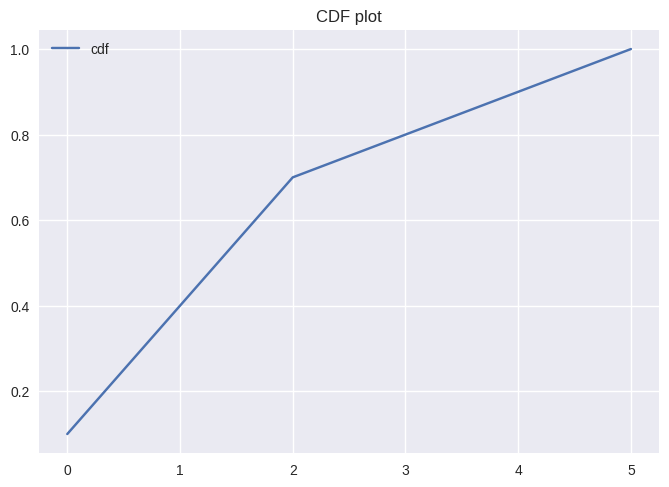

Generated samples
[2]
[1]
[4]
[4]
[3]
[2]
[3]
[1]
[1]
[3]


In [84]:
samples = [1, 3, 2, 4, 2, 3, 5, 7, 3, 2]
generate(n=6, samples=samples, plot_cdf=True)

print("Generated samples")

for i in range(10):
    print(generate(n=6, samples=samples))

## Problem 3

In [85]:
samples = np.array([
    [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
    [1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0]])

class Node:
    def __init__(self, prob=None, index=0, is_leaf=False, condition=None):
        self.prob = prob
        self.is_leaf = is_leaf
        self.left = None
        self.right = None
        self.index = index
        self.condition = condition
        
    def __repr__(self):
        prob = 0 if self.prob is None else self.prob
        return f"node: {id(self)}, prob:{prob:.4f}, index:{self.index}"
        

In [86]:

class SolverMarkov:
    def __init__(self, samples):
        self.samples = samples
        self.n_samples = len(samples[0])
        self.root = None
        
    def start(self, node):
        left_prob = len(np.where(self.samples[:, 0] == 1)[0])/len(self.samples)
        right_prob = 1 - left_prob
        node.left = Node(prob=left_prob, index=0)
        node.right = Node(prob=right_prob, index=0)
        return node.left, node.right
    
    def fxn(self, node, i, condition):
        left_prob = len(np.where((self.samples[:, i] == 1) & (self.samples[:, i-1] == condition))[0])/len(np.where(self.samples[:, i-1] == condition)[0])
        right_prob = 1 - left_prob
        node.left = Node(prob=left_prob, index=i)
        node.right = Node(prob=right_prob, index=i)
        return node.left, node.right
    
    def solve(self, ):
        q = queue.Queue()
        self.root = Node()
        left, right = self.start(self.root)
        q.put(left)
        q.put(right)
                
        while q.qsize() != 0:
            for condition in [1, 0]:
                temp_node = q.get()
                if temp_node.index == self.n_samples - 1:
                    continue
                
                if temp_node is None:
                    continue
                
                left, right = self.fxn(temp_node, temp_node.index + 1, condition)
                q.put(left)
                q.put(right)
                
                
        print("Done")
        return self.root
        

In [87]:
solver = SolverMarkov(samples=samples)
root = solver.solve()

Done


In [88]:
def create_graph(node, graph=None):
    if graph is None:
        graph = graphviz.Digraph(format='png', graph_attr={'rankdir': 'LR'})

    if node is not None:
        graph.node(str(id(node)), 
                   label=f"Prob: {node.prob:.4f}" if node.prob is not None else 'Start',
                   style='filled',
                   fillcolor='lightblue' if node.prob is None else 'white')

        if node.left is not None:
            graph.edge(str(id(node)), str(id(node.left)), label='1')
            create_graph(node.left, graph)

        if node.right is not None:
            graph.edge(str(id(node)), str(id(node.right)), label='0')
            create_graph(node.right, graph)

    return graph


graph = create_graph(root)


In [89]:
graph.render("tree_graph", cleanup=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.444509 to fit


'tree_graph.png'

In [90]:
def generate(root):
    result = []
    
    def fxn(node):
        if node is None or node.left is None or node.right is None:
            return 
        out = np.random.binomial(1, node.left.prob, 1)[0]
        result.append(out)
        fxn(node.left if out == 1 else node.right)
    
    fxn(root)
    return result            

In [91]:
generated_samples_markov = []

for i in range(1000):
    generated_samples_markov.append(generate(root))
    
generated_samples_markov[:10]

[[0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [92]:
def find_intelligen_human(samples, only_101=False, only_11=False, output=True):
    def has_101(arr):
        for i in range(0, len(arr) - 2):
            if [arr[i], arr[i+1], arr[i+2]] == [1, 0, 1]:
                return True
            
        return False
    
    def has_11(arr):
        for i in range(0, len(arr) - 1):
            if [arr[i], arr[i + 1]] == [1, 1]:
                return True
            
        return False
    
    counter = 0
    for sample in samples:
        if only_101:
            counter += has_101(sample)
        elif only_11:
            counter += has_11(sample)
        else:
            counter += has_101(sample) & has_11(sample)
    if output:
        print(f"{counter} intelligent out of {len(samples)}")
    else:
        return counter
    

In [93]:
find_intelligen_human(generated_samples_markov)

667 intelligent out of 1000


In [94]:

class SolverTwo:
    def __init__(self, samples):
        self.samples = samples
        self.n_samples = len(samples[0])
        self.root = None
        
    def start(self, node):
        left_prob = len(np.where(self.samples[:, 0] == 1)[0])/len(self.samples)
        right_prob = 1 - left_prob
        node.left = Node(prob=left_prob, index=0, condition=[1])
        node.right = Node(prob=right_prob, index=0, condition=[0])
        return node.left, node.right

    def find(self, i, targets, extra=True, return_indices=False):
        condition = True
        for idx, target in enumerate(reversed(targets)):
            condition = condition & (self.samples[:, i-idx-1] == target)
        
        condition = condition & extra
        if return_indices:
            return np.where(condition)[0]
        else:
            return len(np.where(condition)[0])
    
    def fxn(self, node, i, condition):
        n_samples = self.find(i-1, condition)
        
        left_prob = self.find(i-1, condition, extra=self.samples[:, i] == 1)/n_samples
        right_prob = 1 - left_prob
        
        node.left = Node(prob=left_prob, index=i, condition=[condition[-1], 1])
        node.right = Node(prob=right_prob, index=i, condition=[condition[-1], 0])
        
        return node.left, node.right
    
    def solve(self, ):
        q = queue.Queue()
        self.root = Node()
        left, right = self.start(self.root)
        
        left.left, left.right = self.fxn(left, left.index + 1, condition=[1])
        right.left, right.right = self.fxn(right, right.index + 1, condition=[0])
        
        q.put(left.left)
        q.put(left.right)
        q.put(right.left)
        q.put(right.right)   
                        
        while q.qsize() != 0:
            temp_node = q.get()
            if temp_node.index == self.n_samples - 1 or temp_node is None:
                continue
            
            left, right = self.fxn(temp_node, temp_node.index + 1, condition=temp_node.condition)
            q.put(left)
            q.put(right)    
                
        print("Done")
        return self.root
        

In [95]:
solver = SolverTwo(samples=samples)
solver

In [96]:
root = solver.solve()

Done


In [97]:
generated_samples_two = []

for i in range(1000):
    generated_samples_two.append(generate(root))
    
generated_samples_two[:10]


[[0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 0, 1, 0, 1, 1, 1]]

In [98]:
find_intelligen_human(generated_samples_two)


531 intelligent out of 1000


In [99]:
markov_11 = find_intelligen_human(generated_samples_markov, only_11=True, output=False)
markov_101 = find_intelligen_human(generated_samples_markov, only_101=True, output=False)
markov_both = find_intelligen_human(generated_samples_markov, output=False)

two_11 = find_intelligen_human(generated_samples_two, only_11=True, output=False)
two_101 = find_intelligen_human(generated_samples_two, only_101=True, output=False)
two_both = find_intelligen_human(generated_samples_two, output=False)


In [100]:
print("Markov assumption:")
print(f"Number of 11: {markov_11} ")
print(f"Number of 101: {markov_101}")
print(f"Number of both: {markov_both}")

print('-'  * 50)
print("Two Previous:")
print(f"Number of 11: {two_11}")
print(f"Number of 101: {two_101}")
print(f"Number of both: {two_both}")


Markov assumption:
Number of 11: 871 
Number of 101: 747
Number of both: 667
--------------------------------------------------
Two Previous:
Number of 11: 797
Number of 101: 593
Number of both: 531


From the abovel, we can observe that markov as well conditioning on previous two gives almost the same results, while markov assumption giving slightly more positive results.

Moreover, it is difficult to estimate how many previous samples we need to condition on to indentify a string of length l. As mentioned in class, the ordering of samples would also matter in such cases. One approach can be to start from the middle of the string and compute MLE while moving away on both the directions from the center. It is difficult to give any concrete idea as it highly depends on the type data and the problem we are trying to solve. 


For gray scale images, we can discretize the pixel value into bins and then do MLE using a Binomial Distribution. In this case, markov assumption wouldn't be a good idea as we intuitively know that pixels depend on the neighbourhood and not just the previous pixel. Hence, we could condition a pixel on a patch around it and then compute MLE. Also, we can assume a gaussian distribution as our parametric distribution centered about a pixel and spreading over a small patch around that pixel. Basically, the idea would be to learn the neighbourhood dependency of each pixel as done in powerful models like CNN. 